## 2 Lab work
## Numerical methods in statistics
Bieliukina Tetiana

The purpose of the work: to find the optimal set of regressors for predicting the mpg value in the mtcars dataset

We are preparing for the analysis - we import all the necessary libraries

In [73]:
library(MASS)
class(mtcars)
library(GGally)
library(ggplot2)

[1] "data.frame"

We are preparing for the analysis - we import all the necessary libraries

In [74]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


Let's also look at the boxplot to see if there are anomalies in the dataset

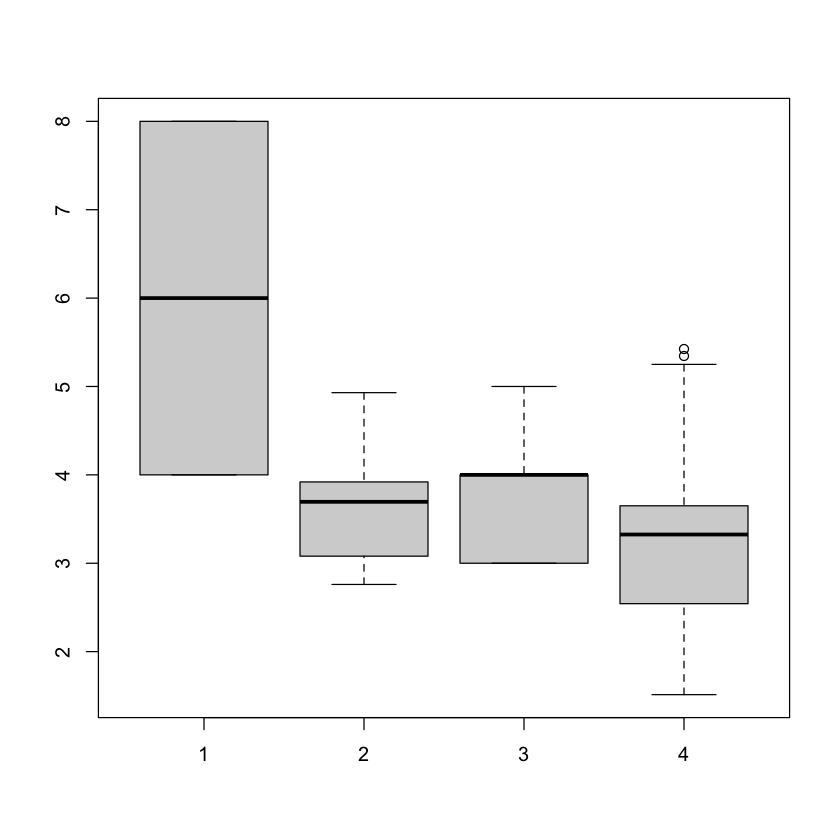

In [75]:
boxplot(mtcars$cyl, mtcars$drat, mtcars$gear, mtcars$wt)

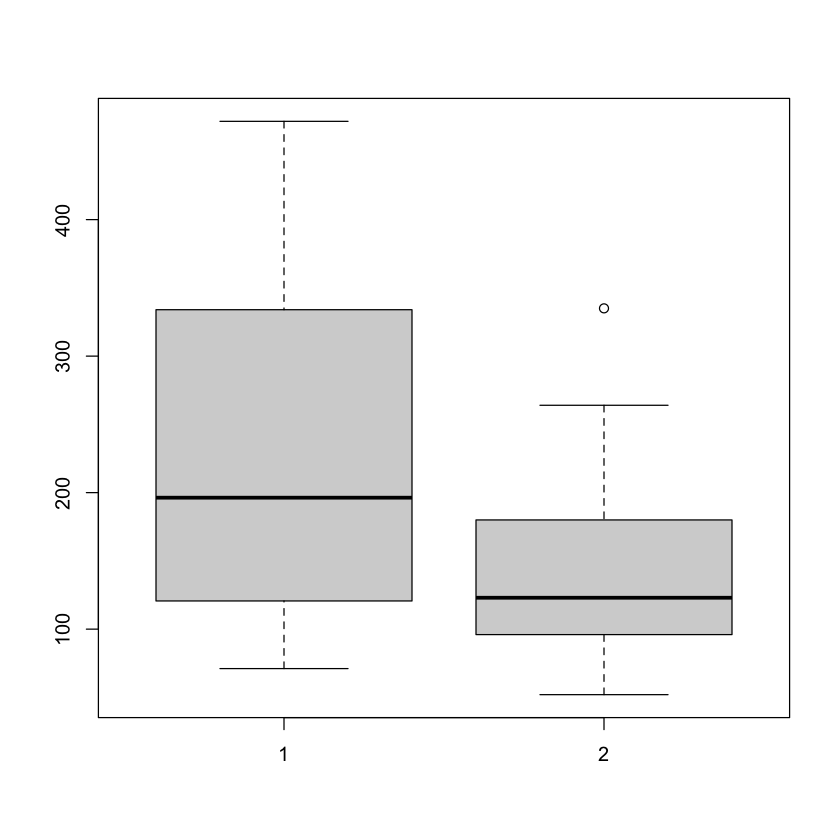

In [76]:
boxplot(mtcars$disp, mtcars$hp)

We can see outliers in the wt(weight) variable found in the Lincoln Continental and Chrysler Imperial, but it doesn't look like an anomaly because these cars are really big, we also see an outlier in the hp variable for the Maserati Bora, which also doesn't look like an anomaly because it's a sports car with lots of horsepower.

A scatter plot is usually a very effective tool in regression analysis. Below we create nice pairwise scatterplots. This is a good way to explore the relationship between all the variables in that data set.

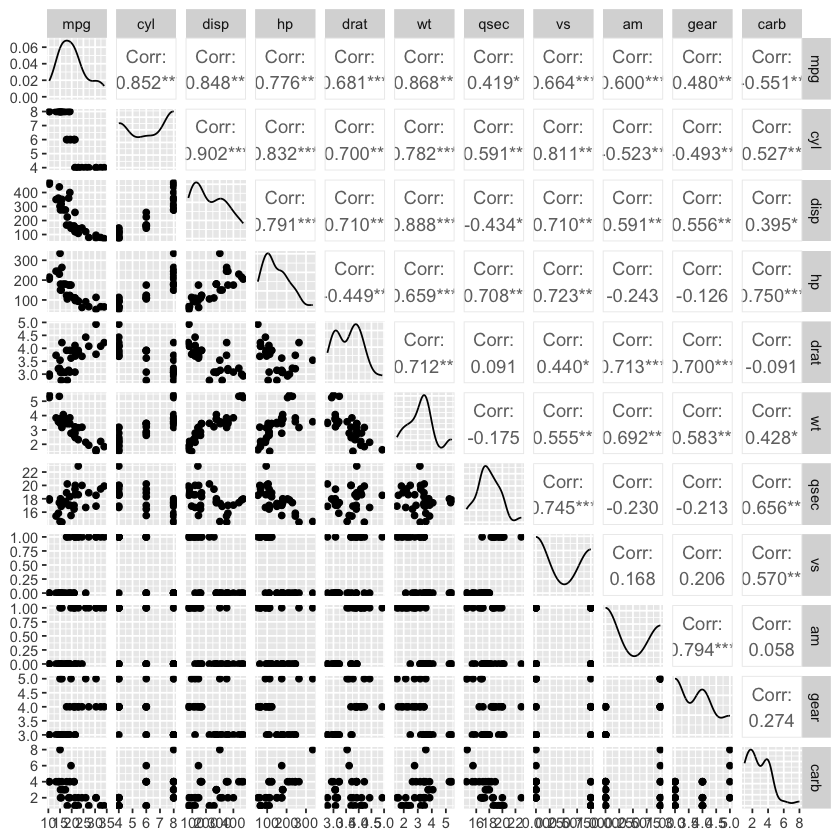

In [77]:
ggpairs(mtcars, axisLabels='show', )

We want to know which combination of predictors will best predict fuel economy. Which predictors increase our accuracy by a statistically significant amount? We could guess some trends from the graph, but what we really want to do is perform a statistical test to determine which predictors are significant and determine the perfect prediction formula.

Including variables that we shouldn't have inflates the actual standard errors of the regression variables. So we don't want to idly add variables to the model. To confirm this fact, you can see below that if we include all the variables, none of them is a significant predictor of MPG (judging by the p-value at the 95% confidence level).

In [78]:
summary(lm(mpg ~ cyl+disp+hp+drat+wt+qsec+factor(vs)+factor(am)+gear+carb, data = mtcars))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),12.30337416,18.71788443,0.6573058,0.51812440
cyl,-0.11144048,1.04502336,-0.1066392,0.91608738
disp,0.01333524,0.01785750,0.7467585,0.46348865
hp,-0.02148212,0.02176858,-0.9868407,0.33495531
drat,0.78711097,1.63537307,0.4813036,0.63527790
wt,-3.71530393,1.89441430,-1.9611887,0.06325215
qsec,0.82104075,0.73084480,1.1234133,0.27394127
factor(vs)1,0.31776281,2.10450861,0.1509915,0.88142347
factor(am)1,2.52022689,2.05665055,1.2254035,0.23398971
gear,0.65541302,1.49325996,0.4389142,0.66520643


In lecture we already found that ordinary linear regression on all variables does not describe the mpg variable well

Detection of collinearity

The main problem with multivariate regression is collinearity. If two or more predictor variables are highly correlated and they are both entered into a regression model, this inflates the true standard error and you get very unstable slope estimates. We can estimate collinearity by the variance inflation factor (VIF). Let's look at the variance inflation factors if we add all the variables to the model. VIF = $\frac{1}{1-R^2_j}$

In [79]:
fitvif <- lm(mpg ~ cyl+disp+hp+drat+wt+qsec+factor(vs)+factor(am)+gear+carb, data = mtcars)
vif(fitvif)

cyl       disp         hp       drat         wt       qsec factor(vs) 
 15.373833  21.620241   9.832037   3.374620  15.164887   7.527958   4.965873 
factor(am)       gear       carb 
  4.648487   5.357452   7.908747

Values for VIF greater than 5 are considered large.

Staged selection method

Among the available methods, we chose to perform a stepwise selection to help us select the subset of variables that best explain MPG. This test is performed using the Akaike information criterion

In [80]:
fit <- lm(mpg ~ cyl+disp+hp+drat+wt+qsec+factor(vs)+factor(am)+gear+carb, data = mtcars)
step <- stepAIC(fit, direction="both", trace=FALSE)
summary(step)$coeff

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.617781,6.9595930,1.381946,1.779152e-01
wt,-3.916504,0.7112016,-5.506882,6.952711e-06
qsec,1.225886,0.2886696,4.246676,2.161737e-04
factor(am)1,2.935837,1.4109045,2.080819,4.671551e-02


In [57]:
summary(step)$r.squared

[1] 0.8496636

Vehicle weight, transmission, and acceleration rate have the most to do with explaining mpg variation. The adjusted R^2 is 84%, meaning that the model explains 84% of the mpg variation, indicating that it is a robust and highly predictive model.

Nested likelihood ratio test

In [58]:
fit1 <- lm(mpg ~ factor(am), data = mtcars)
fit2 <- lm(mpg ~ factor(am)+wt, data = mtcars)
fit3 <- lm(mpg ~ factor(am)+wt+qsec, data = mtcars)
fit4 <- lm(mpg ~ factor(am)+wt+qsec+disp, data = mtcars)
fit5 <- lm(mpg ~ factor(am)+wt+qsec+disp+hp, data = mtcars)
anova(fit1, fit2, fit3, fit4, fit5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,720.8966,NA,NA,NA,NA
2,29,278.3197,1,442.57690,74.9945513,3.876690e-09
3,28,169.2859,1,109.03377,18.4757461,2.139757e-04
4,27,166.0099,1,3.27607,0.5551293,4.629119e-01
5,26,153.4378,1,12.57205,2.1303314,1.563873e-01


As you can see, the result is consistent with a stepwise selection model, and adding any other variable in addition to wt, am, and qsec will dramatically increase the variation in the model, and the p-value will immediately become insignificant.

Now, using the selected variables, we can fit the final model.

In [81]:
finalfit <- lm(mpg ~ wt+qsec+factor(am), data = mtcars)
summary(finalfit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.617781,6.9595930,1.381946,1.779152e-01
wt,-3.916504,0.7112016,-5.506882,6.952711e-06
qsec,1.225886,0.2886696,4.246676,2.161737e-04
factor(am)1,2.935837,1.4109045,2.080819,4.671551e-02


In [83]:
summary(finalfit)$r.squared

[1] 0.8496636

You may notice that all variables are now statistically significant. This model explains 84% of the difference in miles on the gallon (MPG).

Can try a logarithmark of variables to get rid of emissions that have been discovered earlier

In [65]:
tryfit <- lm(mpg ~ log(wt) + log(qsec) + factor(am), data = mtcars)
summary(tryfit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-20.884040,15.076812,-1.385176,1.769360e-01
log(wt),-14.029363,2.050169,-6.843028,1.956008e-07
log(qsec),19.468311,4.658492,4.179102,2.595006e-04
factor(am)1,1.721109,1.320392,1.303483,2.030266e-01


In [66]:
summary(tryfit)$r.squared

[1] 0.8862558

This model explains 88% of the difference in miles to Gallon (MPG).

In [67]:
fitvif <- lm(mpg ~ log(wt) + log(qsec) + factor(am), data = mtcars)
vif(fitvif)

log(wt)  log(qsec) factor(am) 
  2.871417   1.457405   2.941882

Multicolinearity is absent

Using QQ-Plot Look as Distributed Remains

Fiat 128 Pontiac Firebird 
              18               25

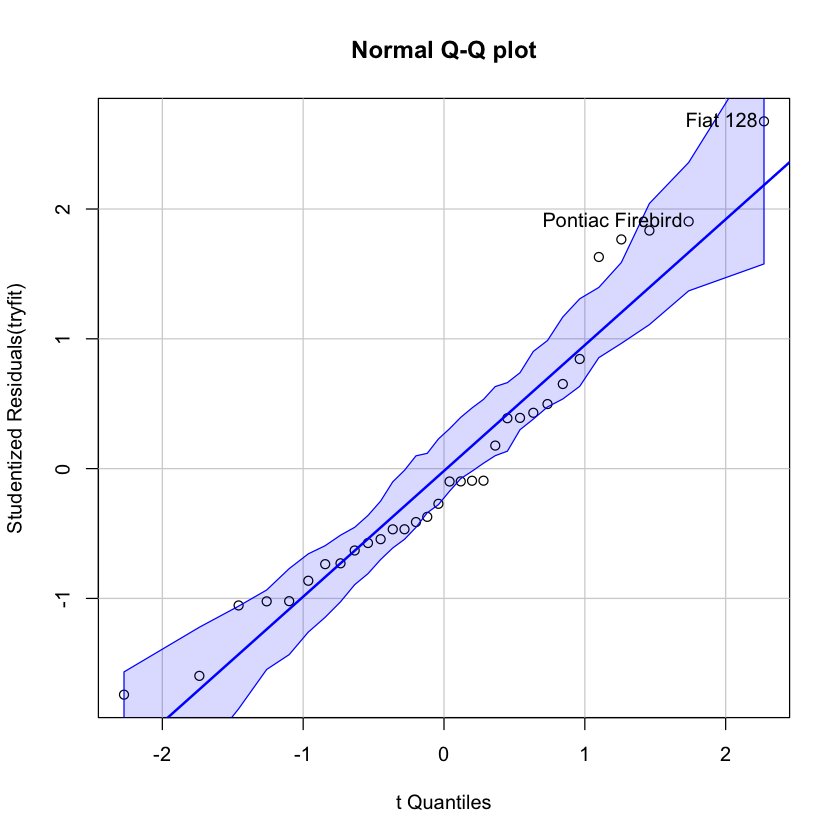

In [68]:
qqPlot(tryfit, main="Normal Q-Q plot")

Similar to a normal distribution, we can also test the residuals for normality using the Shapiro test

In [69]:
shapiro.test(tryfit$resid)


	Shapiro-Wilk normality test

data:  tryfit$resid
W = 0.94008, p-value = 0.07528


We obtained a p-value > 0.05, we accept the null hypothesis that the residuals are normally distributed.
Also, to check the "adequacy" of the model, we can use the built-in R function - gvlma:

In [70]:
library(gvlma)
gvlma(tryfit)


Call:
lm(formula = mpg ~ log(wt) + log(qsec) + factor(am), data = mtcars)

Coefficients:
(Intercept)      log(wt)    log(qsec)  factor(am)1  
    -20.884      -14.029       19.468        1.721  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = tryfit) 

                     Value p-value                Decision
Global Stat        4.09696  0.3930 Assumptions acceptable.
Skewness           2.52845  0.1118 Assumptions acceptable.
Kurtosis           0.05101  0.8213 Assumptions acceptable.
Link Function      1.51517  0.2184 Assumptions acceptable.
Heteroscedasticity 0.00233  0.9615 Assumptions acceptable.

1. Global Stat - there is a linear relationship between the independent and dependent variables
2. Skewness - the date is not shifted
3. Kurtosis - lack of kurtosis (very high or low peak)
4. Link Function - a continuous variable
5. Heteroscedasticity – independence of the variance of random components from the observation number

All checks passed